# ~~~~~ Day 5 ~~~~~ 
## Part 1

In [1]:
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

lines = []
with open('d05.txt', 'r') as f:
    content = f.readlines()

rex = re.compile(r'(?P<x1>\d+)\,(?P<y1>\d+)[\ \-\>]*(?P<x2>\d+)\,(?P<y2>\d+)')
for line in content:
    if len(line)>1:
        m = rex.search(line)
        x1 = int(m.group('x1'))
        y1 = int(m.group('y1'))
        x2 = int(m.group('x2'))
        y2 = int(m.group('y2'))                
        lines.append([x1, y1, x2, y2])

coords = np.matrix(lines)
coords

matrix([[911, 808, 324, 221],
        [161, 890, 808, 243],
        [174,  59, 174, 760],
        ...,
        [964, 864, 964, 919],
        [871, 293, 344, 293],
        [895, 258, 972, 258]])

In [2]:
maxx = np.max(coords[:, [0, 2]])
maxy = np.max(coords[:, [1, 3]])
(maxx, maxy)

(990, 989)

In [3]:
field = np.zeros(shape=(maxy+1, maxx+1), dtype=int)
for line in coords:
    x1 = line[0, 0]
    y1 = line[0, 1]
    x2 = line[0, 2]
    y2 = line[0, 3]
    #print(x1, y1, x2, y2)
    if x1 == x2:
        a, b = tuple(sorted((y1, y2)))
        #print(f'x ({x1},{a}) -> ({x1},{b})')
        for y in range(a, b+1):
            field[y, x1] += 1
    if y1 == y2:
        a, b = tuple(sorted((x1, x2)))
        #print(f'y ({a},{y1}) -> ({b},{y1})')
        for x in range(a, b+1):
            field[y1, x] += 1
field

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

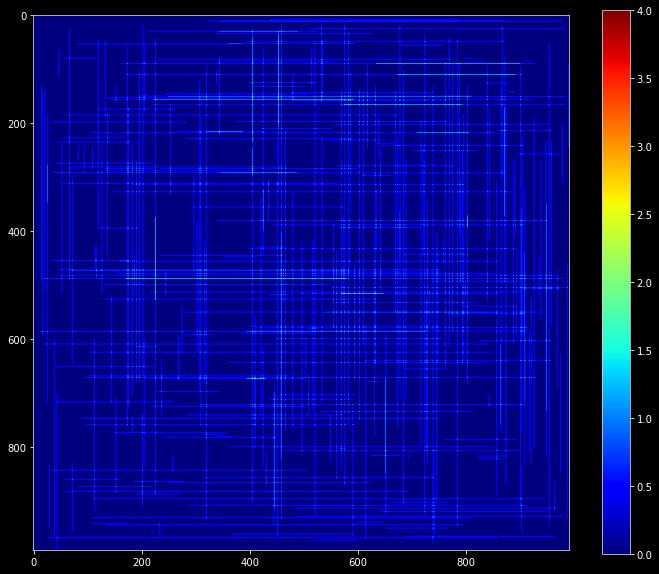

In [4]:
fig = plt.figure(figsize=(12,10))
plt.imshow(field, cmap='jet')
plt.colorbar()

In [5]:
(field>1).sum()

5167

## Part 2

In [10]:
field = np.zeros(shape=(maxy+1, maxx+1), dtype=int)
for line in coords:
    x1 = line[0, 0]
    y1 = line[0, 1]
    x2 = line[0, 2]
    y2 = line[0, 3]
    #print(x1, y1, x2, y2)
    if x1 == x2:
        a, b = tuple(sorted((y1, y2)))
        #print(f'x ({x1},{a}) -> ({x1},{b})')
        for y in range(a, b+1):
            field[y, x1] += 1
    elif y1 == y2:
        a, b = tuple(sorted((x1, x2)))
        #print(f'y ({a},{y1}) -> ({b},{y1})')
        for x in range(a, b+1):
            field[y1, x] += 1
    else:
        dx = x2 - x1
        dy = y2 - y1
        if abs(dx)-abs(dy) == 0:
            #print('diagonal')
            sx = 1 if dx>0 else -1
            sy = 1 if dy>0 else -1
            for i in range(0, abs(dx)+1):
                field[y1 + i*sy, x1 + i*sx] += 1
field

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

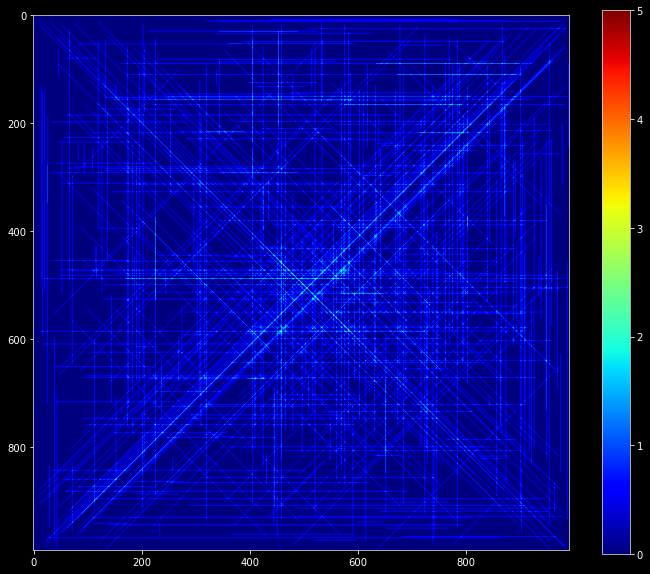

In [11]:
fig = plt.figure(figsize=(12,10))
plt.imshow(field, cmap='jet')
plt.colorbar()

In [12]:
(field>1).sum()

17604